# db에서 df로 데이터 받아와서 분석

In [1]:
import pymysql
import mysql.connector
import time
import pandas as pd

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [2]:
##### db에서 df로 자료 가져오는 기본형태 #####
"""
Maria_db = pymysql.connect(
    user='root', 
    passwd='1234', 
    host='localhost', 
    db='project', 
    charset='utf8'
)
cursor = Maria_db.cursor(pymysql.cursors.DictCursor)

cursor.execute("")

table_data = cursor.fetchall()
df_db_nation_key = pd.DataFrame(table_data)

Maria_db.commit()
Maria_db.close()
"""

'\nMaria_db = pymysql.connect(\n    user=\'root\', \n    passwd=\'1234\', \n    host=\'localhost\', \n    db=\'project\', \n    charset=\'utf8\'\n)\ncursor = Maria_db.cursor(pymysql.cursors.DictCursor)\n\ncursor.execute("")\n\ntable_data = cursor.fetchall()\ndf_db_nation_key = pd.DataFrame(table_data)\n\nMaria_db.commit()\nMaria_db.close()\n'

## total_score로 그룹화, 상/하위로 나눠서 빈도수(국가,제작사,장르,키워드) 추출

In [3]:
##### df로 자료 받아오기 #####
Maria_db = pymysql.connect(
    user='root', 
    passwd='1234', 
    host='localhost', 
    db='project', 
    charset='utf8'
)
cursor = Maria_db.cursor(pymysql.cursors.DictCursor)

##### 21년도 ######
## nation
cursor.execute("select nation, count(nation) from score_table left join detail_table on detail_table.title=score_table.title where year=2021 and total_score >= (select avg(total_score) from score_table) group by nation;")
table_data = cursor.fetchall()
df_uprank_nation_21 = pd.DataFrame(table_data)

cursor.execute("select nation, count(nation) from score_table left join detail_table on detail_table.title=score_table.title where year=2021 and total_score < (select avg(total_score) from score_table) group by nation;")
table_data = cursor.fetchall()
df_downrank_nation_21 = pd.DataFrame(table_data)

## prod
cursor.execute("select prod, count(prod) from score_table left join detail_table on detail_table.title=score_table.title where year=2021 and total_score >= (select avg(total_score) from score_table) group by prod;")
table_data = cursor.fetchall()
df_uprank_prod_21 = pd.DataFrame(table_data)

cursor.execute("select prod, count(prod) from score_table left join detail_table on detail_table.title=score_table.title where year=2021 and total_score < (select avg(total_score) from score_table) group by prod;")
table_data = cursor.fetchall()
df_downrank_prod_21 = pd.DataFrame(table_data)

## genre
cursor.execute("select genre, count(genre), keyword, count(keyword) from score_table left join detail_table on detail_table.title=score_table.title where year=2021 and total_score >= (select avg(total_score) from score_table) group by genre;")
table_data = cursor.fetchall()
df_uprank_genre_21 = pd.DataFrame(table_data)

cursor.execute("select genre, count(genre) from score_table left join detail_table on detail_table.title=score_table.title where year=2021 and total_score < (select avg(total_score) from score_table) group by genre;")
table_data = cursor.fetchall()
df_downrank_genre_21 = pd.DataFrame(table_data)

## keyword
cursor.execute("select keyword, count(keyword) from score_table left join detail_table on detail_table.title=score_table.title where year=2021 and total_score >= (select avg(total_score) from score_table) group by keyword;")
table_data = cursor.fetchall()
df_uprank_keyword_21 = pd.DataFrame(table_data)

cursor.execute("select keyword, count(keyword) from score_table left join detail_table on detail_table.title=score_table.title where year=2021 and total_score < (select avg(total_score) from score_table) group by keyword;")
table_data = cursor.fetchall()
df_downrank_keyword_21 = pd.DataFrame(table_data)


##### 20년도 ######
## nation
cursor.execute("select nation, count(nation) from score_table left join detail_table on detail_table.title=score_table.title where year=2020 and total_score >= (select avg(total_score) from score_table) group by nation;")
table_data = cursor.fetchall()
df_uprank_nation_20 = pd.DataFrame(table_data)

cursor.execute("select nation, count(nation) from score_table left join detail_table on detail_table.title=score_table.title where year=2020 and total_score < (select avg(total_score) from score_table) group by nation;")
table_data = cursor.fetchall()
df_downrank_nation_20 = pd.DataFrame(table_data)

## prod
cursor.execute("select prod, count(prod) from score_table left join detail_table on detail_table.title=score_table.title where year=2020 and total_score >= (select avg(total_score) from score_table) group by prod;")
table_data = cursor.fetchall()
df_uprank_prod_20 = pd.DataFrame(table_data)

cursor.execute("select prod, count(prod) from score_table left join detail_table on detail_table.title=score_table.title where year=2020 and total_score < (select avg(total_score) from score_table) group by prod;")
table_data = cursor.fetchall()
df_downrank_prod_20 = pd.DataFrame(table_data)

## genre
cursor.execute("select genre, count(genre) from score_table left join detail_table on detail_table.title=score_table.title where year=2020 and total_score >= (select avg(total_score) from score_table) group by genre;")
table_data = cursor.fetchall()
df_uprank_genre_20 = pd.DataFrame(table_data)

cursor.execute("select genre, count(genre) from score_table left join detail_table on detail_table.title=score_table.title where year=2020 and total_score < (select avg(total_score) from score_table) group by genre;")
table_data = cursor.fetchall()
df_downrank_genre_20 = pd.DataFrame(table_data)

## keyword
cursor.execute("select keyword, count(keyword) from score_table left join detail_table on detail_table.title=score_table.title where year=2020 and total_score >= (select avg(total_score) from score_table) group by keyword;")
table_data = cursor.fetchall()
df_uprank_keyword_20 = pd.DataFrame(table_data)

cursor.execute("select keyword, count(keyword) from score_table left join detail_table on detail_table.title=score_table.title where year=2020 and total_score < (select avg(total_score) from score_table) group by keyword;")
table_data = cursor.fetchall()
df_downrank_keyword_20 = pd.DataFrame(table_data)

##### 21년도 ######
## genre 전부 카운트
cursor.execute("select genre, count(genre) from score_table left join detail_table on detail_table.title=score_table.title where year=2021 group by genre;")
table_data = cursor.fetchall()
df_rank_genre_21 = pd.DataFrame(table_data)
##### 20년도 ######
## genre 전부 카운트
cursor.execute("select genre, count(genre) from score_table left join detail_table on detail_table.title=score_table.title where year=2020  group by genre;")
table_data = cursor.fetchall()
df_rank_genre_20 = pd.DataFrame(table_data)


Maria_db.commit()
Maria_db.close()

##### 21년도 ###### nation , prod , genre , keyword
#df_uprank_nation_21
#df_downrank_nation_21

##### 20년도 ######
#df_uprank_nation_20
#df_downrank_nation_20

# 파이 그래프 ####

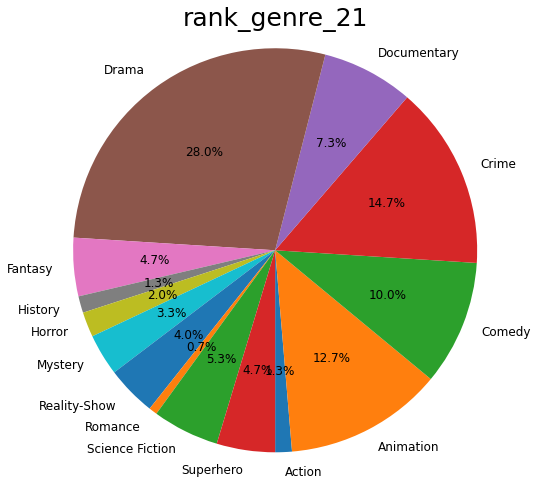

In [4]:
#####  rank_genre_21 2021년도 전체 자료에서 "장르" 빈도 ######
##2020년 데이터는 21을 20으로 바꿔서 적용
genre=df_rank_genre_21['genre'].tolist()
result=df_rank_genre_21['count(genre)'].values.tolist()

plt.figure(figsize=(8,8))
plt.pie(result,labels=genre, autopct="%.1f%%",textprops={'size': 12},startangle=270) #소수 아래 한자리로 %비율 표시. %%=%도 함께 표기 #startangle=각도
plt.title("rank_genre_21",fontsize=25)
plt.axis('equal') 
plt.savefig("pi_rank_genre_21.png",dpi=150)  #이미지 저장 경로.파일명 "C:/Users/계정명/Desktop/python_basic/df_downrank_nation_21.png"
plt.show()

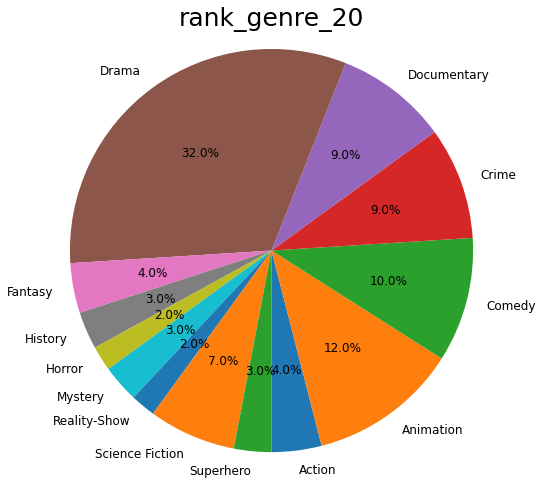

In [5]:
#####  rank_genre_20 2021년도 전체 자료에서 "장르" 빈도 ######
##2020년 데이터는 21을 20으로 바꿔서 적용
genre=df_rank_genre_20['genre'].tolist()
result=df_rank_genre_20['count(genre)'].values.tolist()

plt.figure(figsize=(8,8))
plt.pie(result,labels=genre, autopct="%.1f%%",textprops={'size': 12},startangle=270) #소수 아래 한자리로 %비율 표시. %%=%도 함께 표기 #startangle=각도
plt.title("rank_genre_20",fontsize=25)
plt.axis('equal') 
plt.savefig("pi_rank_genre_20.png",dpi=150)  #이미지 저장 경로.파일명 "C:/Users/계정명/Desktop/python_basic/df_downrank_nation_21.png"
plt.show()

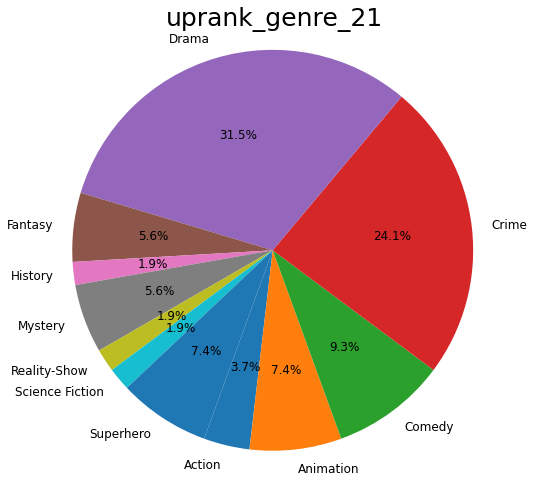

In [6]:
#####  up rank_genre_21 2021년도 상위 토탈스코어 50% 자료에서 "장르" 빈도 ######
## 2020년 데이터는 21로 바꿔서 적용
## 하위 50%는 uprank를 downrank 로 수정하여 적용
genre=df_uprank_genre_21['genre'].tolist()
result=df_uprank_genre_21['count(genre)'].values.tolist()

plt.figure(figsize=(8,8))
plt.pie(result,labels=genre, autopct="%.1f%%",textprops={'size': 12},startangle=250) #소수 아래 한자리로 %비율 표시. %%=%도 함께 표기 #startangle=각도
plt.title("uprank_genre_21",fontsize=25)
plt.axis('equal') 
plt.savefig("pi_uprank_genre_20.png",dpi=150)
plt.show()

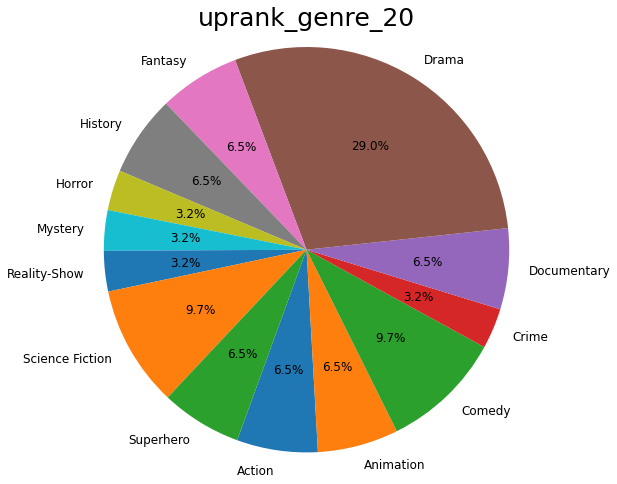

In [7]:
#####  up rank_genre_20 2020년도 상위 토탈스코어 50% 자료에서 "장르" 빈도 ######
## 2020년 데이터는 20으로 바꿔서 적용
## 하위 50%는 uprank를 downrank 로 수정하여 적용
genre=df_uprank_genre_20['genre'].tolist()
result=df_uprank_genre_20['count(genre)'].values.tolist()

plt.figure(figsize=(8,8))
plt.pie(result,labels=genre, autopct="%.1f%%",textprops={'size': 12},startangle=250) #소수 아래 한자리로 %비율 표시. %%=%도 함께 표기 #startangle=각도
plt.title("uprank_genre_20",fontsize=25)
plt.axis('equal') 
plt.savefig("pi_uprank_genre_20.png",dpi=150)
plt.show()

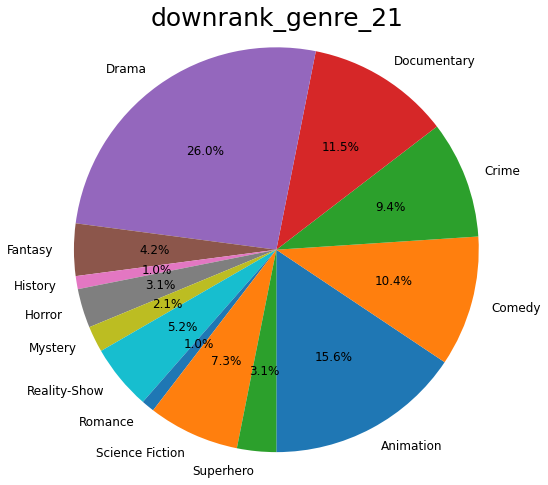

In [8]:
#####  up rank_genre_21 2021년도 하위 토탈스코어 50% 자료에서 "장르" 빈도 ######
## 2020년 데이터는 21로 바꿔서 적용
## 하위 50%는 uprank를 downrank 로 수정하여 적용
genre=df_downrank_genre_21['genre'].tolist()
result=df_downrank_genre_21['count(genre)'].values.tolist()

plt.figure(figsize=(8,8))
plt.pie(result,labels=genre, autopct="%.1f%%",textprops={'size': 12},startangle=270) #소수 아래 한자리로 %비율 표시. %%=%도 함께 표기 #startangle=각도
plt.title("downrank_genre_21",fontsize=25)
plt.axis('equal') 
plt.savefig("pi_uprank_genre_20.png",dpi=150)
plt.show()

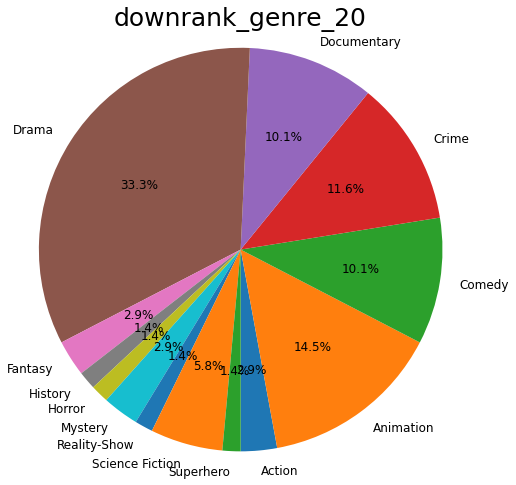

In [9]:
#####  up rank_genre_21 2021년도 하위 토탈스코어 50% 자료에서 "장르" 빈도 ######
## 2020년 데이터는 21로 바꿔서 적용
genre=df_downrank_genre_20['genre'].tolist()
result=df_downrank_genre_20['count(genre)'].values.tolist()

plt.figure(figsize=(8,8))
plt.pie(result,labels=genre, autopct="%.1f%%",textprops={'size': 12},startangle=270) #소수 아래 한자리로 %비율 표시. %%=%도 함께 표기 #각도 startangle=각도
plt.title("downrank_genre_20",fontsize=25)
plt.axis('equal') 
plt.savefig("pi_downrank_genre_20.png",dpi=150)
plt.show()

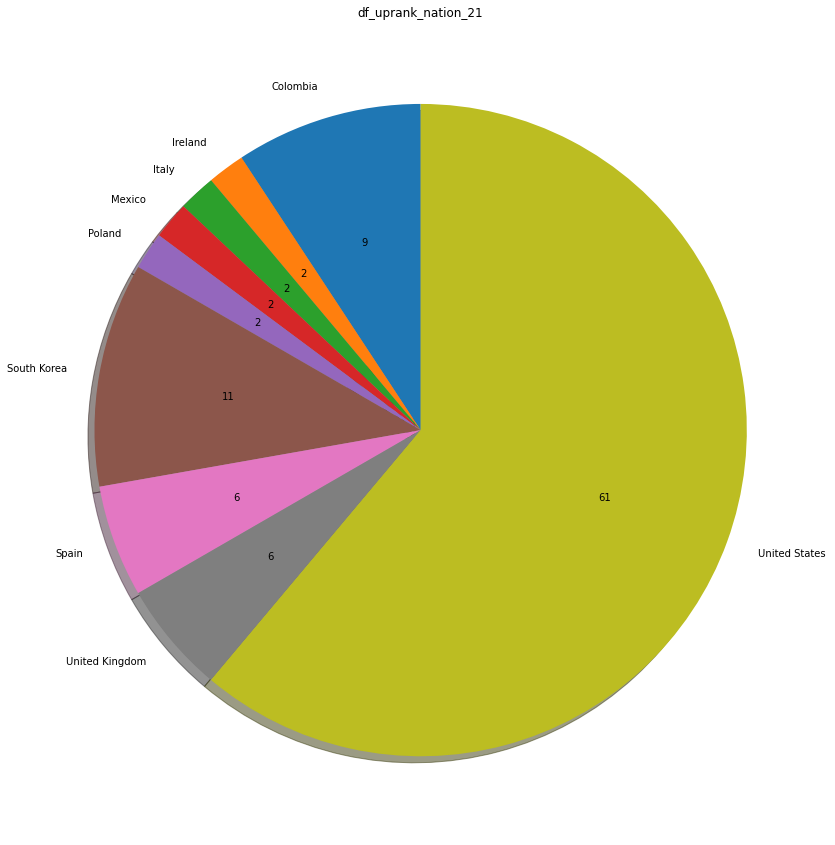

In [10]:
#####  uprank_nation_21  2021년도 상위 토탈스코어 50% 자료에서 "국가" 빈도 ######
plt.figure(figsize=(30,15))
plt.pie(list(df_uprank_nation_21["count(nation)"]),labels=list(df_uprank_nation_21["nation"]),autopct="%.0f",startangle=90,
       shadow=True) # 폭발시키기. 숫자만큼 떨어뜨리기. #그림자주기
plt.title("df_uprank_nation_21")
plt.savefig("df_uprank_nation_21.png",dpi=150)#파일저장 dpi=해상도 조절 가능
plt.show()

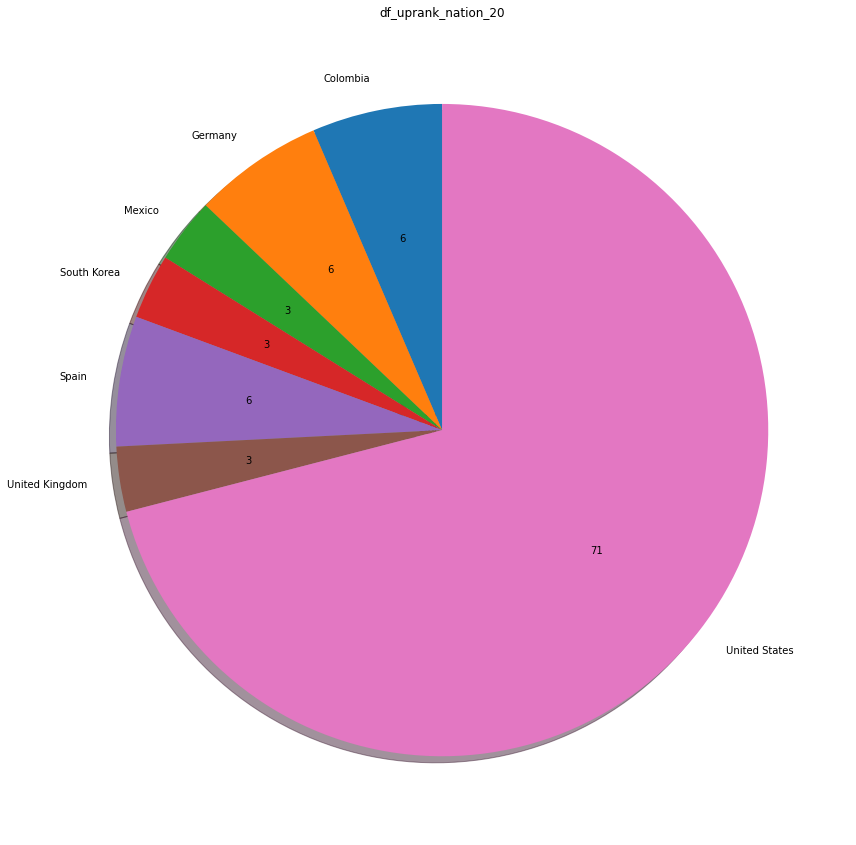

In [11]:
#####  uprank_nation_20  2020년도 상위 토탈스코어 50% 자료에서 "국가" 빈도 ######
plt.figure(figsize=(30,15))
plt.pie(list(df_uprank_nation_20["count(nation)"]),labels=list(df_uprank_nation_20["nation"]),autopct="%.0f",startangle=90,
       shadow=True) # 폭발시키기. 숫자만큼 떨어뜨리기. #그림자주기
plt.title("df_uprank_nation_20")
plt.savefig("df_uprank_nation_20.png",dpi=150)#파일저장 dpi=해상도 조절 가능
plt.show()

In [12]:
##### 국가별 빈도 비교 파이 그래프 (2020,2021)#####
Maria_db = pymysql.connect(
    user='root', 
    passwd='1234', 
    host='localhost', 
    db='project', 
    charset='utf8'
)
cursor = Maria_db.cursor(pymysql.cursors.DictCursor)

##### 21년도 ######
## nation 전부 카운트
cursor.execute("select nation, count(nation) from score_table left join detail_table on detail_table.title=score_table.title where year=2021 group by nation order by count(nation);")
table_data = cursor.fetchall()
df_rank_nation_21 = pd.DataFrame(table_data)


##### 20년도 ######
## nation 전부 카운트
cursor.execute("select nation, count(nation) from score_table left join detail_table on detail_table.title=score_table.title where year=2020  group by nation;")
table_data = cursor.fetchall()
df_rank_nation_20 = pd.DataFrame(table_data)


Maria_db.commit()
Maria_db.close()

df_rank_nation_20 =df_rank_nation_20.dropna()
df_rank_nation_21 =df_rank_nation_21.dropna()

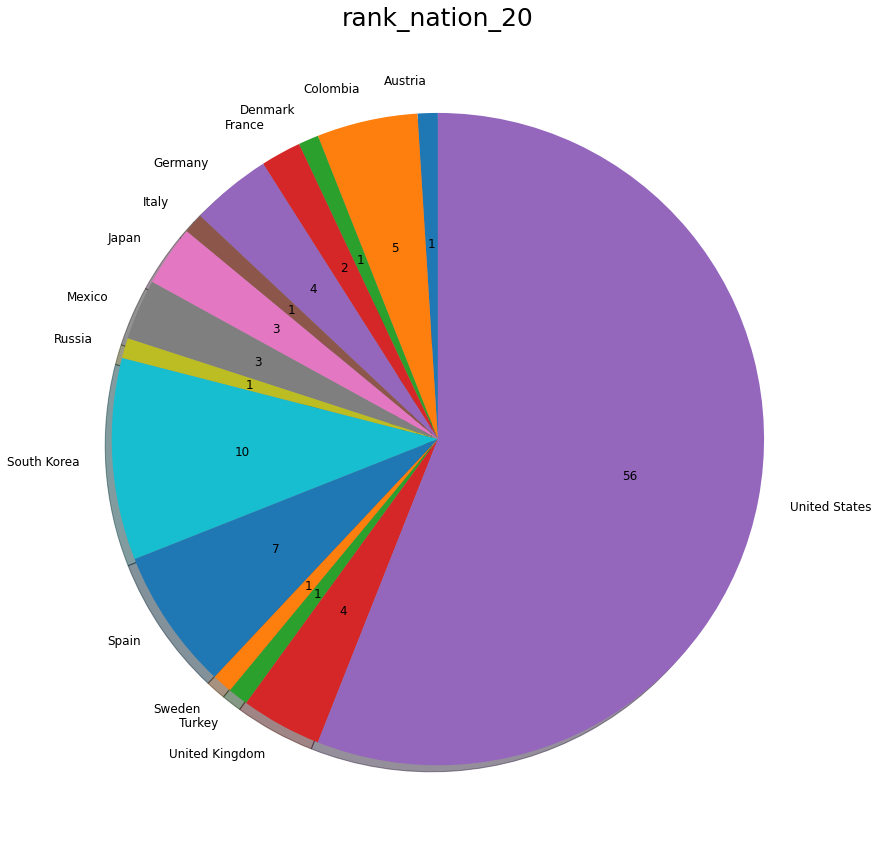

In [13]:
#####  _nation_20  2020년도  토탈스코어에서 "국가" 빈도 ######
plt.figure(figsize=(15,15))
plt.pie(list(df_rank_nation_20["count(nation)"]),labels=list(df_rank_nation_20["nation"]),autopct="%.0f",textprops={'size': 12},startangle=90,
       shadow=True) # 폭발시키기. 숫자만큼 떨어뜨리기. #그림자주기
plt.title("rank_nation_20",fontsize=25)
plt.savefig("df_rank_nation_20.png",dpi=150)#파일저장 dpi=해상도 조절 가능
plt.show()

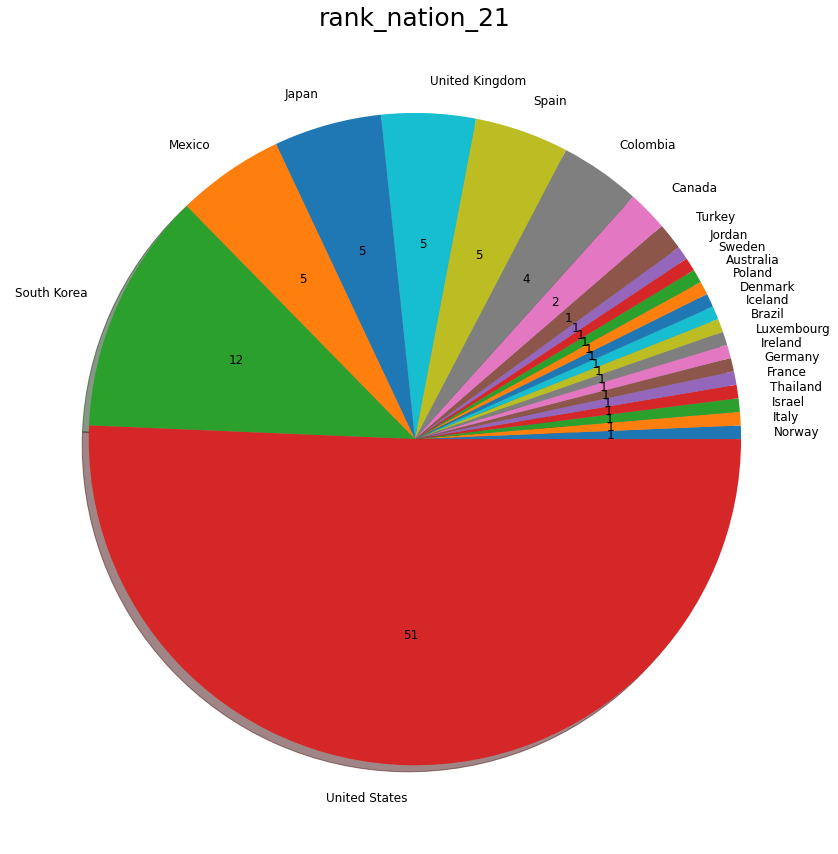

In [14]:
#####  _nation_21  2021년도  토탈스코어에서 "국가" 빈도 ######
plt.figure(figsize=(15,15))
plt.pie(list(df_rank_nation_21["count(nation)"]),labels=list(df_rank_nation_21["nation"]),autopct="%.0f",textprops={'size': 12},
        startangle=0,
       shadow=True) # 폭발시키기. 숫자만큼 떨어뜨리기. #그림자주기
plt.title("rank_nation_21",fontsize=25)
plt.savefig("df_rank_nation_21.png",dpi=150)#파일저장 dpi=해상도 조절 가능
plt.show()

# 막대그래프

In [15]:
"""
 국가별 2020,2021년도 각각 Total_score 가져오기
"""
Maria_db = pymysql.connect(
    user='root', 
    passwd='1234', 
    host='localhost', 
    db='project', 
    charset='utf8'
)
cursor = Maria_db.cursor(pymysql.cursors.DictCursor)

####  국가별 2020 Total_score 가져오기 ####
cursor.execute("select nation, total_score from detail_table, score_table  where detail_table.title = score_table.title and year = '2020' group by nation;")
table_rows = cursor.fetchall()
nat_total_score_20 = pd.DataFrame(table_rows)
# df.reset_index(drop = True)

####  국가별 2021 Total_score 가져오기  ####
cursor.execute("select nation, total_score from detail_table, score_table  where detail_table.title = score_table.title and year = '2021' group by nation;")
table_rows = cursor.fetchall()
nat_total_score_21 = pd.DataFrame(table_rows)
# df.reset_index(drop = True)

Maria_db.close()

#nat_total_score_20
#nat_total_score_21


In [16]:
nation_list_20 = list(nat_total_score_20["nation"])
total_score_list_20 = list(nat_total_score_20["total_score"])
nation_list_21 = list(nat_total_score_21["nation"])
total_score_list_21 = list(nat_total_score_21["total_score"])

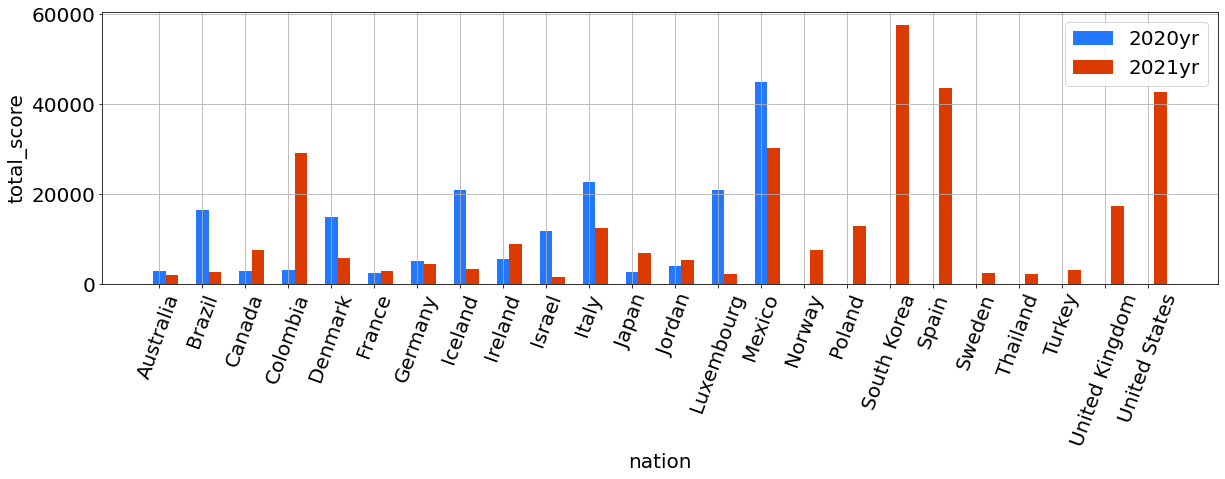

In [17]:
##### 20년 21년도 국가별 토탈스코어 #####
matplotlib .rcParams['axes.unicode_minus']=False
matplotlib .rcParams['font.size']=20
#-----------------------------------------------
plt.figure(figsize = (20, 5))
plt.xlabel("nation")
plt.ylabel("total_score")
plt.grid()
plt.bar(range(len(nation_list_20)), total_score_list_20, align="center", width=0.3, color="#2478FF", label="2020yr")
plt.bar(np.arange(len(nation_list_21))+0.3, total_score_list_21, align="center", width=0.3, color="#DB3A00", label="2021yr")
plt.xticks(range(len(nation_list_21)), nation_list_21, rotation = 70)
plt.legend()

#plt.savefig("bat_년도_국가별_토탈스코어_비교.png",dpi=150)

plt.show()


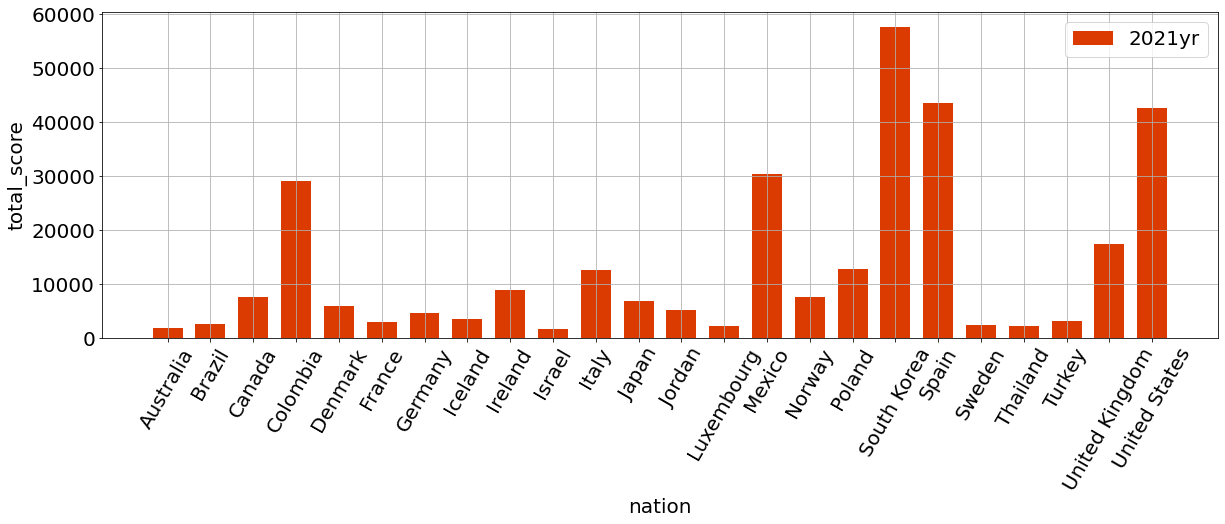

In [18]:
##### 2021 국가별 total_score #####
nation_list_21 = list(nat_total_score_21["nation"])
total_score_list_21 = list(nat_total_score_21["total_score"])

plt.figure(figsize = (20, 6))
plt.xlabel("nation")
plt.ylabel("total_score")
plt.grid()
plt.bar(range(len(nation_list_21)), total_score_list_21, align="center", width=0.7, color="#DB3A00", label="2021yr")
plt.xticks(range(len(nation_list_21)), nation_list_21, rotation = 60)
plt.legend()
plt.legend()
#plt.savefig("C:\Users\ASIA\Documents\asia_an\class.png",dpi=150)
#plt.savefig("bat_국가별점수2021.png",dpi=150)
plt.show()

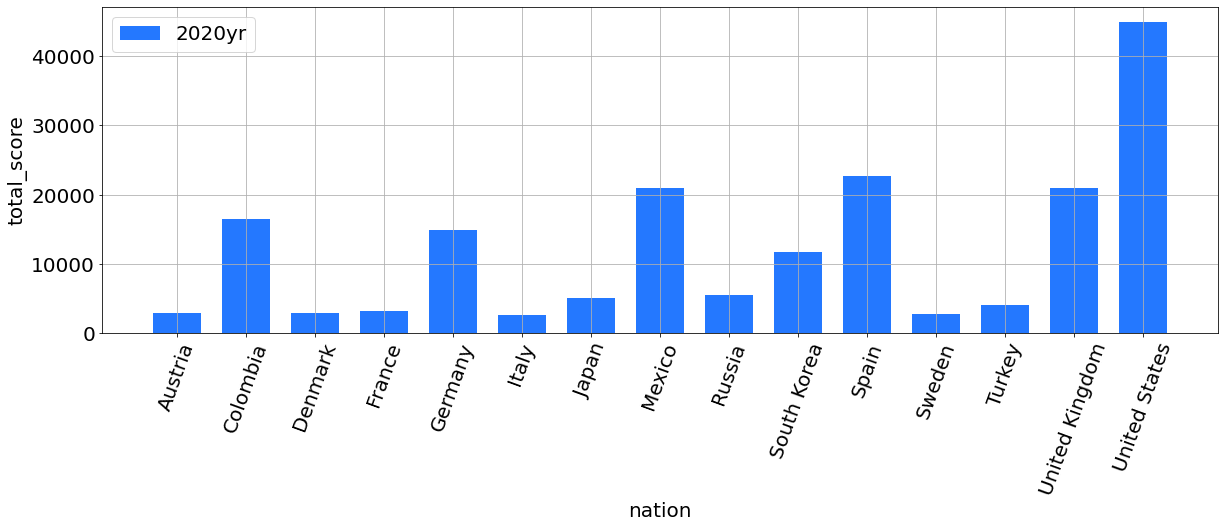

In [19]:
##### 2020국가별 total_score #####
nation_list_20 = list(nat_total_score_20["nation"])
total_score_list_20 = list(nat_total_score_20["total_score"])

plt.figure(figsize = (20, 6))
plt.xlabel("nation")
plt.ylabel("total_score")
plt.grid()
plt.bar(range(len(nation_list_20)), total_score_list_20, align="center", width=0.7, color="#2478FF",label="2020yr")
plt.xticks(range(len(nation_list_20)), nation_list_20, rotation = 70)
plt.legend()
#plt.savefig("bat_국가별점수2020.png",dpi=150)
plt.show()

In [20]:
"""
제작사별 2020,2021 count 가져오기 
"""
Maria_db = pymysql.connect(
    user='root', 
    passwd='1234', 
    host='localhost', 
    db='project', 
    charset='utf8'
)
cursor = Maria_db.cursor(pymysql.cursors.DictCursor)

#### 제작자별 2020 Total_score ####
cursor.execute("select prod, count(score_table.title) as Movies from detail_table, score_table  where detail_table.title = score_table.title and year = '2020' group by prod;")
table_rows = cursor.fetchall()
prod_total_score_20 = pd.DataFrame(table_rows)

#### 제작자별 2021 Total_score ####
cursor.execute("select prod, count(score_table.title) as Movies from detail_table, score_table  where detail_table.title = score_table.title and year = '2021' group by prod;")
table_rows = cursor.fetchall()
prod_total_score_21 = pd.DataFrame(table_rows)

Maria_db.close()

prod_total_score_20
prod_total_score_21

,prod,Movies
0,None,40
1,HBO,1
2,Netflix,109


In [21]:
#### None을 ETC로 변경 ####
prod_total_score_20.iloc[0,0] = "ETC."
prod_total_score_21.iloc[0,0] = "ETC."

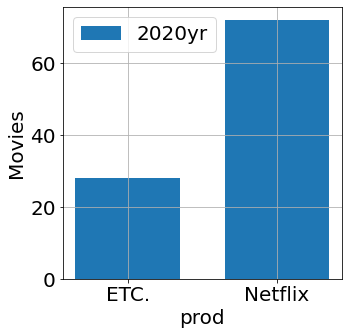

In [22]:
##### 2020 제작자별 total_score #####
nation_list_20 = list(prod_total_score_20["prod"])
total_score_list_20 = list(prod_total_score_20["Movies"])

matplotlib .rcParams['axes.unicode_minus']=False
matplotlib .rcParams['font.size']=20
#-----------------------------------------------

plt.figure(figsize = (5, 5))
plt.xlabel("prod")
plt.ylabel("Movies")
plt.grid()
plt.bar(range(len(nation_list_20)), total_score_list_20, align="center", width=0.7, label="2020yr")
plt.xticks(range(len(nation_list_20)), nation_list_20, rotation = 0)
plt.legend()
plt.savefig("bat_제작자별count2020.png",dpi=150)
plt.show()

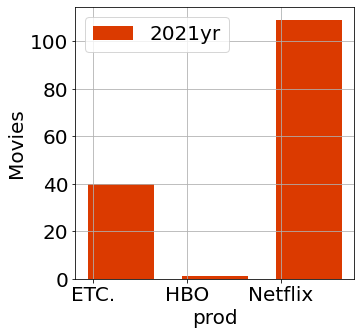

In [23]:
##### 2021 제작자별 total_score #####
nation_list_21 = list(prod_total_score_21["prod"])
total_score_list_21 = list(prod_total_score_21["Movies"])

matplotlib .rcParams['axes.unicode_minus']=False
matplotlib .rcParams['font.size']=20
#-----------------------------------------------

plt.figure(figsize = (5, 5))
plt.xlabel("prod")
plt.ylabel("Movies")
plt.grid()
plt.bar(np.arange(len(nation_list_21))+0.3, total_score_list_21, align="center", width=0.7, color="#DB3A00", label="2021yr")
plt.xticks(range(len(nation_list_21)), nation_list_21, rotation = 0)
plt.legend()
plt.savefig("bat_제작자별count2021.png",dpi=150)
plt.show()



#### 년도별 제작사 비율 파이그래프

In [24]:
#### None을 ETC로 변경 ####
prod_total_score_20.iloc[0,0] = "ETC."
prod_total_score_21.iloc[0,0] = "ETC."
total_score_list_21

[40, 1, 109]

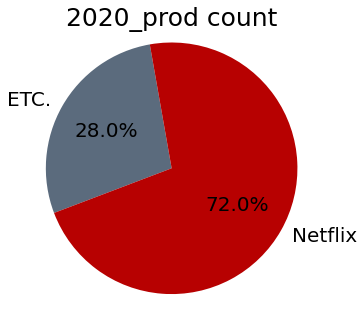

In [25]:
##### 2020 제작자별 카운트 #####
nation_list_20 = list(prod_total_score_20["prod"])
total_score_list_20 = list(prod_total_score_20["Movies"])

matplotlib .rcParams['axes.unicode_minus']=False
matplotlib .rcParams['font.size']=20
#-----------------------------------------------
plt.figure(figsize=(5,5))
plt.pie(total_score_list_20, labels=nation_list_20 , autopct="%.1f%%",textprops={'size': 20},startangle=100
       ,colors=['#5b6b7d','#b70101']) #소수 아래 한자리로 %비율 표시. %%=%도 함께 표기 #각도 startangle=각도
plt.title("2020_prod count",fontsize=25)
plt.axis('equal') 
plt.savefig("pi_제작자별카운트2020",dpi=150)
plt.show()
#-----------------------------------------------


In [26]:
prod_total_score_20

,prod,Movies
0,ETC.,28
1,Netflix,72


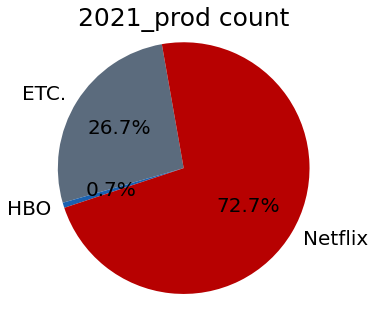

In [27]:
##### 2021 제작자별 카운트 #####
nation_list_21 = list(prod_total_score_21["prod"])
total_score_list_21 = list(prod_total_score_21["Movies"])

matplotlib .rcParams['axes.unicode_minus']=False
matplotlib .rcParams['font.size']=20
#-----------------------------------------------
plt.figure(figsize=(5,5))
plt.pie(total_score_list_21, labels=nation_list_21 , autopct="%.1f%%",textprops={'size': 20},
        startangle=100,colors=['#5b6b7d','#1a61b0','#b70101']) #소수 아래 한자리로 %비율 표시. %%=%도 함께 표기 #각도 startangle=각도
plt.title("2021_prod count",fontsize=25)
plt.axis('equal') 
plt.savefig("pi_제작자별카운트2021.png",dpi=150)
plt.show()

In [28]:
prod_total_score_21

,prod,Movies
0,ETC.,40
1,HBO,1
2,Netflix,109


In [29]:
"""
장르별 2020, 2021 Total_score 가져오기 
"""

Maria_db = pymysql.connect(
    user='root', 
    passwd='1234', 
    host='localhost', 
    db='project', 
    charset='utf8'
)
cursor = Maria_db.cursor(pymysql.cursors.DictCursor)

#### 장르별  2020 Total_score 가져오기 ####
cursor.execute("select genre, total_score from detail_table, score_table  where detail_table.title = score_table.title and year = '2020' group by genre;")
table_rows = cursor.fetchall()
genre_total_score_20 = pd.DataFrame(table_rows)
# df.reset_index(drop = True)

#### 장르별  2021 Total_score 가져오기 ####
cursor.execute("select genre, total_score from detail_table, score_table  where detail_table.title = score_table.title and year = '2021' group by genre;")
table_rows = cursor.fetchall()
genre_total_score_21 = pd.DataFrame(table_rows)

Maria_db.close()

#genre_total_score_20
#genre_total_score_21

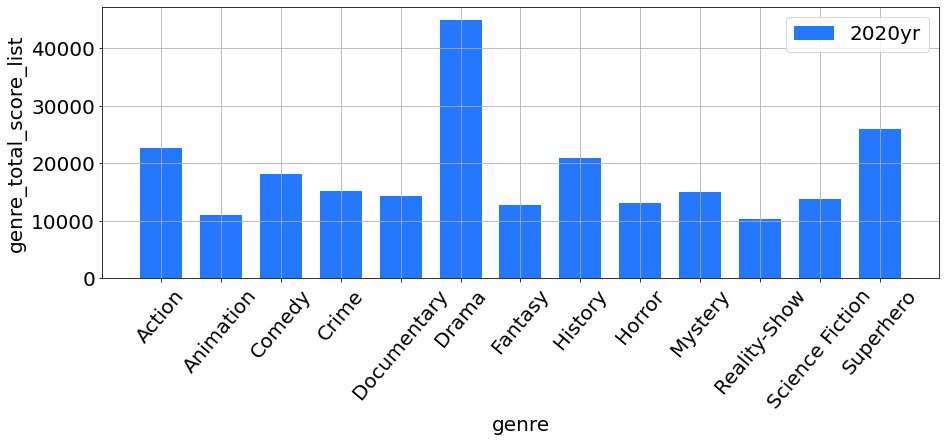

In [30]:
"""
장르별 2020 Total_score 가져오기 
"""
# y축 -수치 해결하기
import matplotlib
matplotlib .rcParams['axes.unicode_minus']=False
matplotlib .rcParams['font.size']=20
#-----------------------------------------------

genre_list_20 = list(genre_total_score_20["genre"])
genre_total_score_list_20 = list(genre_total_score_20["total_score"])

plt.figure(figsize = (15, 5))
plt.xlabel("genre")
plt.ylabel("genre_total_score_list")
plt.grid()
plt.bar(range(len(genre_list_20)), genre_total_score_list_20, align="center", width=0.7, color="#2478FF", label="2020yr")
plt.xticks(range(len(genre_list_20)), genre_list_20, rotation = 50)
plt.legend()
#plt.savefig("bat_장르별점수2020.png",dpi=150)
plt.show()

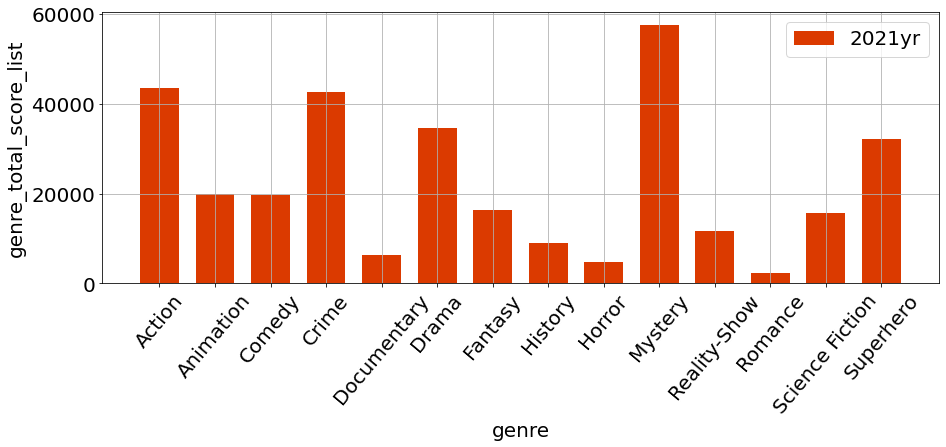

In [31]:
"""
장르별 2021 Total_score 가져오기 
"""
# y축 -수치 해결하기
import matplotlib
matplotlib .rcParams['axes.unicode_minus']=False
matplotlib .rcParams['font.size']=20
#-----------------------------------------------

genre_list_21 = list(genre_total_score_21["genre"])
genre_total_score_list_21 = list(genre_total_score_21["total_score"])

plt.figure(figsize = (15, 5))
plt.xlabel("genre")
plt.ylabel("genre_total_score_list")
plt.grid()
plt.bar(range(len(genre_list_21)), genre_total_score_list_21, align="center", width=0.7, color="#DB3A00", label="2021yr")
plt.xticks(range(len(genre_list_21)), genre_list_21, rotation = 50)
plt.legend()

#plt.gcf().subplots_adjust(bottom=0.20)
#plt.savefig("bat_장르별점수2021.png",dpi=150)
plt.show()

In [32]:
df_uprank_prod_20

,prod,count(prod)
0,None,0
1,Netflix,22


In [33]:
############ 상/하위 토탈스코어 랭크에서 넷플릭스 자제제작 빈도 비교 (같은 년도 끼리 )###########

In [34]:
#### up + down #####
df_pr21=pd.concat([df_uprank_prod_21,df_downrank_prod_21],ignore_index=True)

#### Netflix인 행만 가져오기####
df21=df_pr21[df_pr21['prod'] != 'Netflix'].index
df_pr21=df_pr21.drop(df21)
df_pr21

,prod,count(prod)
1,Netflix,41
4,Netflix,68


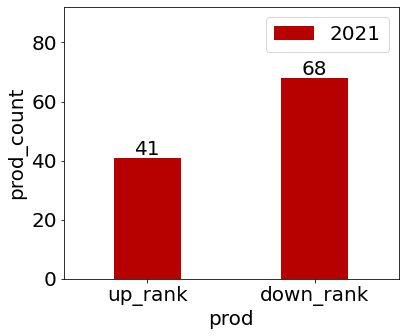

In [35]:
matplotlib .rcParams['axes.unicode_minus']=False
matplotlib .rcParams['font.size']=20
#-----------------------------------------------
df_upprod_21 = list(df_pr21["count(prod)"])
df_prod_id=['up_rank','down_rank']

plt.figure(figsize = (6, 5))
plt.xlabel("prod")
plt.ylabel("prod_count")
#plt.grid()

plt.bar(range(len(df_upprod_21)),df_upprod_21, align="center", width=0.4, color="#b70101", label="2021")
plt.xticks(range(len(df_prod_id)), df_prod_id, rotation = 0)
plt.text(0-0.08,df_upprod_21[0]+1,df_upprod_21[0])
plt.text(1-0.08,df_upprod_21[1]+1,df_upprod_21[1])
plt.xlim(-1+0.5, 2-0.5)
plt.ylim(0,92)
plt.legend()
plt.savefig("bat_넷플릭스 상하위 비율 2021.png",dpi=150)
plt.show()

In [36]:
#### 2020 ####

#### up + down #####
df_pr20 = pd.concat([df_uprank_prod_20,df_downrank_prod_20],ignore_index=True)
df20=df_pr20[df_pr20['prod'] != 'Netflix'].index
df_pr20=df_pr20.drop(df20)
df_pr20

,prod,count(prod)
1,Netflix,22
3,Netflix,50


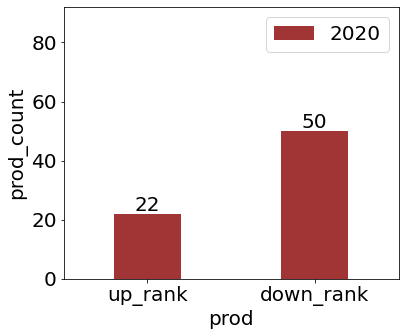

In [37]:
matplotlib .rcParams['axes.unicode_minus']=False
matplotlib .rcParams['font.size']=20
#-----------------------------------------------
df_upprod_20 = list(df_pr20["count(prod)"])
df_prod_id=['up_rank','down_rank']

plt.figure(figsize = (6, 5))
plt.xlabel("prod")
plt.ylabel("prod_count")
#plt.grid()

plt.bar(range(len(df_upprod_20)),df_upprod_20, align="center", width=0.4, color="#a13434", label="2020")
plt.xticks(range(len(df_prod_id)), df_prod_id, rotation = 0)
plt.text(0-0.08,df_upprod_20[0]+1,df_upprod_20[0])
plt.text(1-0.08,df_upprod_20[1]+1,df_upprod_20[1])
plt.xlim(-1+0.5,2-0.5)
plt.ylim(0,92)
plt.legend()
plt.savefig("bat_넷플릭스 상하위 비율 2020.png",dpi=150)
plt.show()

In [38]:
###### TOP 100 넷플릭스 카운트 ######

Maria_db = pymysql.connect(
    user='root', 
    passwd='1234', 
    host='localhost', 
    db='project', 
    charset='utf8'
)
cursor = Maria_db.cursor(pymysql.cursors.DictCursor)
# 내림차순, (2020 Total_score TOP 100)
cursor.execute("select prod, count(prod) from score_table left join detail_table on detail_table.title=score_table.title where year=2020 and prod='Netflix' group by prod order by total_score desc;")
table_data = cursor.fetchall()
df_prod_20 = pd.DataFrame(table_data)

# 내림차순, 101번부터 200번 까지( 2021 Total_Score TOP100 )


cursor = Maria_db.cursor(pymysql.cursors.DictCursor)

cursor.execute("select prod, count(prod) from score_table left join detail_table on detail_table.title=score_table.title where year=2021 and prod='Netflix' and (id_sc between 101 and 200) group by prod order by total_score desc;")
table_data = cursor.fetchall()
df_prod_21 = pd.DataFrame(table_data)
Maria_db.commit()
Maria_db.close()


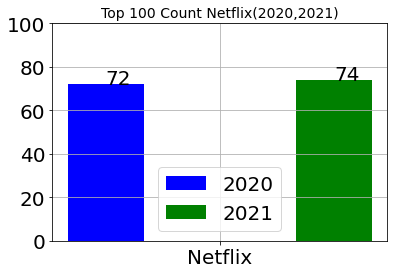

In [39]:
matplotlib .rcParams['axes.unicode_minus']=False
matplotlib .rcParams['font.size']=20
#-----------------------------------------------
prod_list_20=list(df_prod_20['prod'])
c_prod_list_20=list(df_prod_20['count(prod)'])
prod_list_21=list(df_prod_21['prod'])
c_prod_list_21=list(df_prod_21['count(prod)'])

n_data=len(prod_list_20)
index=np.arange(n_data)

plt.grid()

plt.bar(index,c_prod_list_20,width=0.1,color="b", label="2020")
plt.bar(index+0.3,c_prod_list_21,width=0.1,color="g",label="2021")
plt.title("Top 100 Count Netflix(2020,2021)",fontsize=14)
plt.xticks(index+0.15,prod_list_20) #tick 아래에 적어주기.
plt.legend()#라벨 위에 보여주기
plt.ylim(0,100)

plt.text(0,c_prod_list_20[0],c_prod_list_20[0])
plt.text(0.3,c_prod_list_21[0],c_prod_list_21[0])
plt.savefig("bat_Count Netflix.png",dpi=150)

plt.show()

# chd 252개 중 181개가 넷플릭스 제작, 과반수 차지. 
#68개는 타 제작사(데이터 없음).
#넷플릭스 자체제작 편수는 2020년 72, 2021년 74 거의 변화 없이 비슷한 결과를 보임.
